In [89]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# print(plt.style.available)
# plt.style.use('_classic_test_patch')
# matplotlib.rcParams.update(mpl.rcParamsDefault) # to reset style to default

In [110]:
log_dir = '/home/hpcgies1/Masters-Thesis/AttemptFour/Log/'
out_dir = '/home/hpcgies1/Masters-Thesis/AttemptFour/Plots/'
models = os.listdir(log_dir)
print(models)

['subject_1_layer_norm', 'subject_2_baseline2', 'all_subjects', 'test_ms3', 'subject_2_attn_layer_norm', 'subject_2_dense_layer_norm', 'subject_1_and_2', 'subs_1_2_5_7', 'subject_2_lstm_layer_norm', 'subject_2_attn_loss', 'subject_2_layer_norm', 'subject_2_both_layer_norm', 'all_subjects_2']


In [111]:
data = {}
for m in models:
    try:
        data[m] = pd.read_csv(f'{log_dir}/{m}/loss_history.csv')
    except FileNotFoundError:
        print(f"model: {m} - has no loss data")
print(data.keys())

model: test_ms3 - has no loss data
dict_keys(['subject_1_layer_norm', 'subject_2_baseline2', 'all_subjects', 'subject_2_attn_layer_norm', 'subject_2_dense_layer_norm', 'subject_1_and_2', 'subs_1_2_5_7', 'subject_2_lstm_layer_norm', 'subject_2_attn_loss', 'subject_2_layer_norm', 'subject_2_both_layer_norm', 'all_subjects_2'])


In [13]:
def get_loss(df, key='val_loss') -> list:
    loss = df.dropna(subset=[key]).groupby('epoch')[key].apply(list)
    return [loss[i][-1] for i in range(len(loss))]

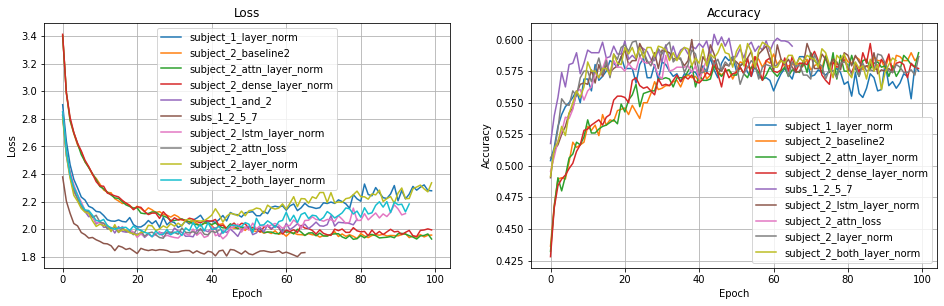

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16,4.5))

for i, (k, v) in enumerate(data.items()):
    ax[0].plot( get_loss(v, 'val_loss'), label=k )
    ax[0].grid('on')

ax[0].legend()
ax[0].set_title("Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

for i, (k, v) in enumerate(data.items()):
    try:
        ax[1].plot( get_loss(v, 'val_accuracy'), label=k)
        ax[1].grid('on')
    except KeyError:
        pass

ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
    
# plt.suptitle("Cross-entropy loss & accuracy")
plt.xlim(xmin = -(.05 * plt.gca().get_xlim()[1]))
# plt.legend()
# plt.grid()
plt.savefig(f"{out_dir}/loss_plot.png")
plt.show()

dict_keys(['subject_1_layer_norm', 'subject_2_baseline2', 'all_subjects', 'subject_2_attn_layer_norm', 'subject_2_dense_layer_norm', 'subject_1_and_2', 'subs_1_2_5_7', 'subject_2_lstm_layer_norm', 'subject_2_attn_loss', 'subject_2_layer_norm', 'subject_2_both_layer_norm', 'all_subjects_2'])


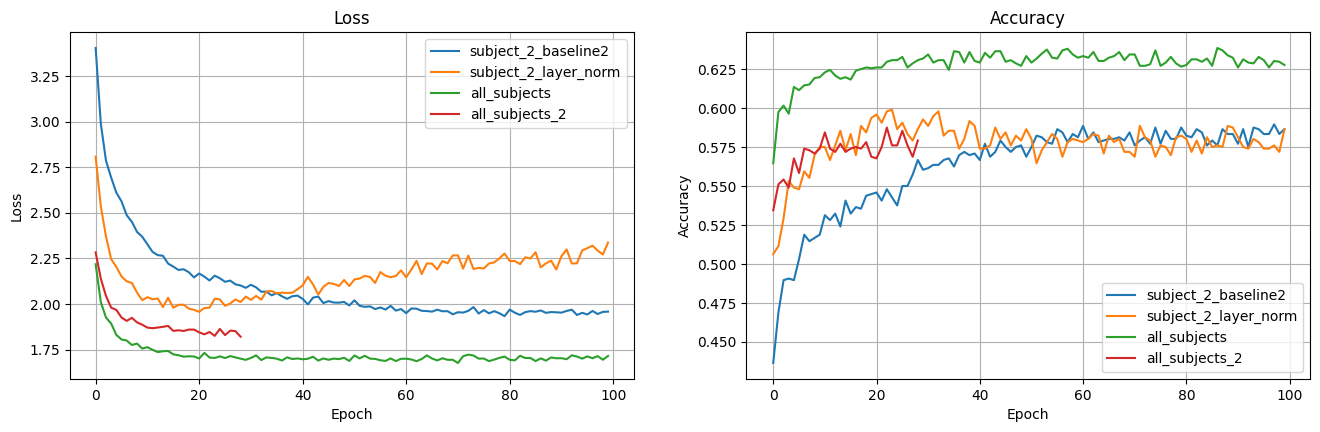

In [113]:
def loss_plot(models_, title_str: str):
    fig, ax = plt.subplots(1, 2, figsize=(16,4.5))

    for k in models_:
        v = data[k]
        ax[0].plot( get_loss(v, 'val_loss'), label=k )
        ax[0].grid('on')
    

    ax[0].legend()
    ax[0].set_title("Loss")
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")

    for k in models_:
        v = data[k]
        try:
            ax[1].plot( get_loss(v, 'val_accuracy'), label=k)
            ax[1].grid('on')
        except KeyError:
            pass

    ax[1].set_title("Accuracy")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    ax[1].legend()

    # plt.suptitle("Cross-entropy loss & accuracy")
    plt.xlim(xmin = -(.05 * plt.gca().get_xlim()[1]))
    # plt.legend()
    # plt.grid()
#     plt.savefig(f"{out_dir}/{title_str}.png")

print(data.keys())

loss_plot([
    'subject_2_baseline2', 'subject_2_layer_norm', 'all_subjects', 'all_subjects_2'], 
    title_str='loss_plot_sub2')

plt.show()

10

In [102]:
df = pd.read_csv(f"/home/hpcgies1/Masters-Thesis/AttemptFour/TrainData/subj08_conditions2.csv")
df.head(2)

,nsd_key,is_shared,is_test
0,22,0,0
1,27,0,0


In [104]:
print(df['nsd_key'].loc[df['is_shared']==1])

224      3050
227      3078
232      3158
233      3165
234      3172
        ...  
5389    72210
5394    72313
5407    72606
5418    72720
5439    72949
Name: nsd_key, Length: 515, dtype: int64
